Copyright **`(c)`** 2024 Giovanni Squillero `<giovanni.squillero@polito.it>`  
[`https://github.com/squillero/computational-intelligence`](https://github.com/squillero/computational-intelligence)  
Free for personal or classroom use; see [`LICENSE.md`](https://github.com/squillero/computational-intelligence/blob/master/LICENSE.md) for details.  

# Set Cover problem

See: https://en.wikipedia.org/wiki/Set_cover_problem

In [1571]:
import random
from itertools import accumulate
from itertools import product
import numpy as np
from matplotlib import pyplot as plt
from icecream import ic
from tqdm.auto import tqdm

## Reproducible Initialization

If you want to get reproducible results, use `rng` (and restart the kernel); for non-reproducible ones, use `np.random`.

In [1572]:
instance = 1

if instance == 1:
    UNIVERSE_SIZE = 100
    NUM_SETS = 10
    DENSITY = 0.2
elif instance == 2:
    UNIVERSE_SIZE = 1_000
    NUM_SETS = 100
    DENSITY = 0.2
elif instance == 3:
    UNIVERSE_SIZE = 10_000
    NUM_SETS = 1_000
    DENSITY = 0.2
elif instance == 4:
    UNIVERSE_SIZE = 100_000
    NUM_SETS = 10_000
    DENSITY = 0.1
elif instance == 5:
    UNIVERSE_SIZE = 100_000
    NUM_SETS = 10_000
    DENSITY = 0.2
elif instance == 6:
    UNIVERSE_SIZE = 100_000
    NUM_SETS = 10_000
    DENSITY = 0.3

rng = np.random.Generator(np.random.PCG64([UNIVERSE_SIZE, NUM_SETS, int(10_000 * DENSITY)]))

In [1573]:
# DON'T EDIT THESE LINES!

SETS = np.random.random((NUM_SETS, UNIVERSE_SIZE)) < DENSITY
for s in range(UNIVERSE_SIZE):
    if not np.any(SETS[:, s]):
        SETS[np.random.randint(NUM_SETS), s] = True
COSTS = np.pow(SETS.sum(axis=1), 1.1)

## Helper Functions

In [1574]:
def valid(solution):
    """Checks wether solution is valid (ie. covers all universe)"""
    return np.all(np.logical_or.reduce(SETS[solution]))

def cost(solution):
    """Returns the cost of a solution (to be minimized)"""
    return COSTS[solution].sum()

def tweak(solution):
    new_solution = solution.copy()
    pos_set = np.random.randint(0, NUM_SETS)
    new_solution[pos_set] = not new_solution[pos_set]
    return new_solution

def coverage(solution):
    """Returns the coverage of a solution"""
    return sum(np.logical_or.reduce(SETS[solution]))

## Basic Hill Climbing

Starting with a empty initial_solution

ic| steps: 34
    valid(current_solution): np.True_
    cost(current_solution): np.float64(305.08456626455626)


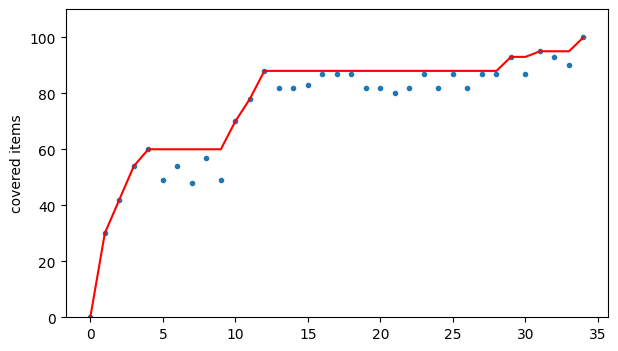

In [1575]:
current_solution = np.full(NUM_SETS, False)
history = [coverage(current_solution)]
steps = 0
while valid(current_solution) == False:
    steps += 1
    new_solution = tweak(current_solution)
    history.append(coverage(new_solution))
    if cost(new_solution) > cost(current_solution):
        current_solution = new_solution
ic(steps, valid(current_solution), cost(current_solution))
plt.figure(figsize=(7, 4))
plt.ylim(0, UNIVERSE_SIZE*1.1)
plt.ylabel("covered items")
plt.plot(range(len(history)), list(accumulate(history, max)), color="red")
_ = plt.scatter(range(len(history)), history, marker=".")

The number of step decrease starting with a random initial_solution with 10% of the sets 

ic| steps: 19
    valid(current_solution): np.True_
    cost(current_solution): np.float64(305.08456626455626)


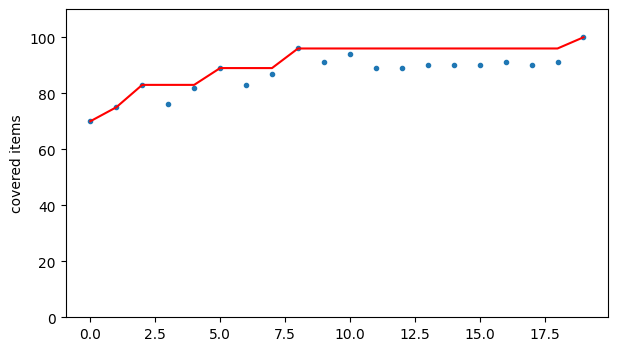

In [1576]:
current_solution = rng.random(NUM_SETS) < 5/NUM_SETS
history = [coverage(current_solution)]
steps = 0
while valid(current_solution) == False:
    steps += 1
    new_solution = tweak(current_solution)
    history.append(coverage(new_solution))
    if cost(new_solution) > cost(current_solution):
        current_solution = new_solution
ic(steps, valid(current_solution), cost(current_solution))
plt.figure(figsize=(7, 4))
plt.ylim(0, UNIVERSE_SIZE*1.1)
plt.ylabel("covered items")
plt.plot(range(len(history)), list(accumulate(history, max)), color="red")
_ = plt.scatter(range(len(history)), history, marker=".")

Trying to take the solution that brings us closest to the result

ic| steps: 34
    valid(current_solution): np.True_
    cost(current_solution): np.float64(305.08456626455626)


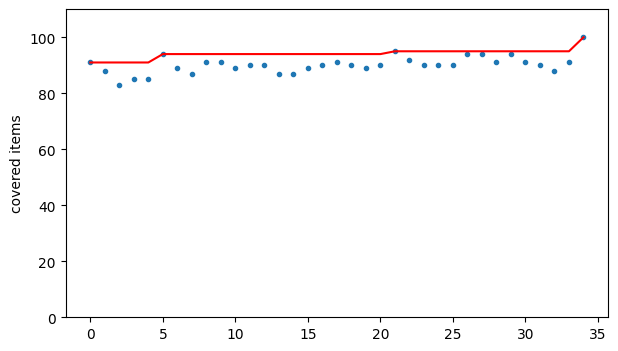

In [1577]:
current_solution = rng.random(NUM_SETS) < 5/NUM_SETS
history = [coverage(current_solution)]
steps = 0
while valid(current_solution) == False:
    steps += 1
    new_solution = tweak(current_solution)
    history.append(coverage(new_solution))
    if (cost(new_solution) < cost(current_solution) and coverage(new_solution) == coverage(current_solution)):
        current_solution = new_solution
    elif coverage(new_solution) > coverage(current_solution):
        current_solution = new_solution
ic(steps, valid(current_solution), cost(current_solution))
plt.figure(figsize=(7, 4))
plt.ylim(0, UNIVERSE_SIZE*1.1)
plt.ylabel("covered items")
plt.plot(range(len(history)), list(accumulate(history, max)), color="red")
_ = plt.scatter(range(len(history)), history, marker=".")

## RMHC

Starting with a random initial_solution with 5/NUM_SETS% of the sets 

ic| steps: 40
    valid(current_solution): np.True_
    cost(current_solution): np.float64(305.08456626455626)


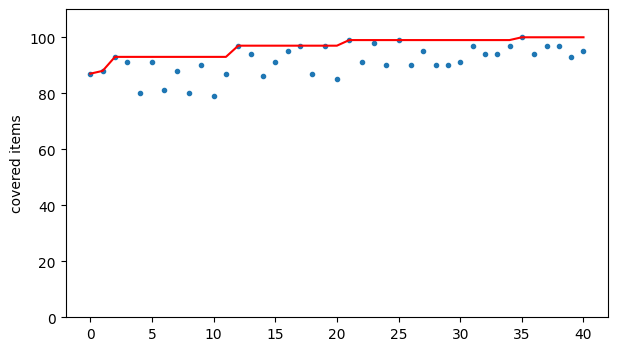

In [1578]:
current_solution = rng.random(NUM_SETS) < 5/NUM_SETS
n = 10
history = [coverage(current_solution)]
steps = 0
while valid(current_solution) == False:
    temp = current_solution[:]
    for inner_step in range(n):
        steps += 1
        new_solution = tweak(current_solution)
        history.append(coverage(new_solution))
        if (cost(new_solution) < cost(temp) and coverage(new_solution) == coverage(temp)):
            temp = new_solution
        elif coverage(new_solution) > coverage(temp):
            temp = new_solution
    if (cost(temp) < cost(current_solution) and coverage(temp) == coverage(current_solution)):
        current_solution = temp
    elif coverage(temp) > coverage(current_solution):
        current_solution = temp
ic(steps, valid(current_solution), cost(current_solution))
plt.figure(figsize=(7, 4))
plt.ylim(0, UNIVERSE_SIZE*1.1)
plt.ylabel("covered items")
plt.plot(range(len(history)), list(accumulate(history, max)), color="red")
_ = plt.scatter(range(len(history)), history, marker=".")

## Steepest Step and Restart

Starting with an empty set

ic| steps: 120
    valid(best_solution): np.True_
    cost(best_solution): np.float64(305.08456626455626)


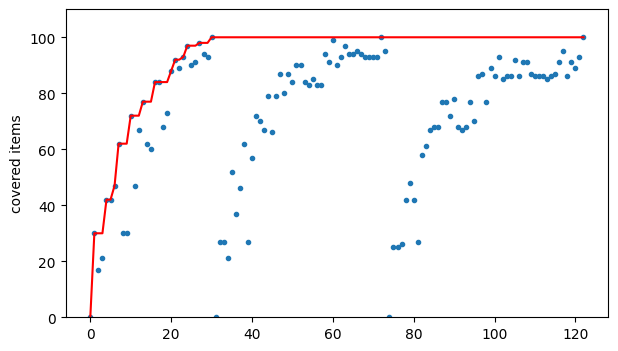

In [1579]:
NUM_RESTARTS = 3
STEEPEST_STEP_CANDIDATES = 3
history = list()
steps = 0
max_value = -1
for i in range(0, NUM_RESTARTS):
    solution = np.full(NUM_SETS, False)
    history.append(coverage(solution))
    while valid(solution) == False:
        candidates = [tweak(solution) for i in range(0, STEEPEST_STEP_CANDIDATES)]
        candidates_fitness = list()
        for c in candidates:
            f = coverage(c)
            history.append(f)
            candidates_fitness.append(f)
        idx = candidates_fitness.index(max(candidates_fitness))
        new_solution = candidates[idx]
        new_fitness = candidates_fitness[idx]
        steps += STEEPEST_STEP_CANDIDATES
        if new_fitness > coverage(solution):
            solution = new_solution
    if coverage(solution) > max_value:
        max_value = coverage(solution)
        best_solution = solution
ic(steps, valid(best_solution), cost(best_solution))
plt.figure(figsize=(7, 4))
plt.ylim(0, UNIVERSE_SIZE*1.1)
plt.ylabel("covered items")
plt.plot(range(len(history)), [max(history[: i + 1]) for i in range(len(history))], color="red")
_ = plt.scatter(range(len(history)), history, marker=".")

Start taking all the sets and randomly remove the set to minimize the cost (for validating the solution in every step are too much time consuming)

In [1580]:
current_solution = np.full(NUM_SETS, True)
history = [coverage(current_solution)]
for n in tqdm(range(10)):
    new_solution = tweak(current_solution)
    history.append(coverage(new_solution))
    if cost(new_solution) < cost(current_solution) and valid(new_solution) == True:
        current_solution = new_solution
ic(valid(current_solution), cost(current_solution))
None

  0%|          | 0/10 [00:00<?, ?it/s]

ic| valid(current_solution): np.True_
    cost(current_solution): np.float64(305.08456626455626)


### sources
- prof example of HC (1-max, multiple-knapsack)
- slides
- wikipedia (https://en.wikipedia.org/wiki/Set_cover_problem)